In [1]:
import keras
import numpy as np
import cv2
import os
import random
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import csv
import zipfile
import tensorflow as tf
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.xception import Xception
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import RandomNormal
import keras.backend as k
from sklearn.utils import shuffle
import io
from PIL import Image as pil_image
from keras_retinanet import layers
import keras.backend as k
import keras_retinanet
import random
import pandas
from skimage import measure,color,filters
import matplotlib.pyplot as plt
from scipy.ndimage import binary_opening, binary_dilation
from scipy.ndimage import zoom

Using TensorFlow backend.


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = '2,3'
config = tf.compat.v1.ConfigProto(allow_soft_placement = True)
# config.gpu_options.per_process_gpu_memory_fraction = 0.7
# config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

一张图 有多个病灶

In [ ]:
def detected_lesion_box(heat1_map):
    gray_heatmap = cv2.cvtColor(heat1_map,cv2.COLOR_BGR2GRAY)
    box_region = np.where(gray_heatmap > 150, 255, 0)

    # print(thre1)
#     plt.figure()
#     plt.imshow(heat1_map)
#     plt.figure()
#     plt.imshow(box_region)
#     # cv2.imwrite('img_gray.jpg',img_gray)

    labeled_img, num = measure.label(box_region,connectivity = 2, background = 0, return_num=True)
    properties = measure.regionprops(labeled_img)
    
    
    valid_box = []
    for prop in properties:
        if prop.area > 800:
            valid_box.append(prop.bbox)
    for i, box in enumerate(valid_box):  #展示每个box
        heat_zeros = np.zeros((512,512))
        heat_zeros[box[0]:box[2],box[1]:box[3]] = 1
        plt.figure()
        plt.imshow(heat_zeros)
#     return labeled_img,valid_box
    plt.figure()
    plt.imshow(heat_zeros)

In [ ]:
valid_box= [[3,1],[9,2],[13,5],[14,11]]
heat_zeros = np.zeros((16,16))
for i, box in enumerate(valid_box):  #展示每个box
    
    heat_zeros[box[0],box[1]] = 1
plt.figure()
fig = plt.gcf()
fig.set_size_inches(7.0/3,7.0/3) #dpi = 300, output = 700*700 pixels
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0, wspace = 0)
plt.margins(0,0)
plt.imshow(heat_zeros)
plt.savefig('local_.jpg', dpi=300)

In [ ]:
# create heat map
test_cam = cv2.resize(cam, (512,512), cv2.INTER_LINEAR)
test_cam = np.maximum(test_cam, 0) # 逐位比较 
heatmap = test_cam / np.max(test_cam)

heat_map = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

# label_img,_= detected_lesion_box(heat_map)

# cv2.imwrite(f'./test_image/{num}/{num}_heat_map.jpg', heat_map)
# cv2.imwrite('test_cam.jpg', heat_map)
# print(output[:,:,0].shape)
c = output[:,:,0]
plt.figure()
plt.imshow(label_img)
plt.show()
plt.figure()
plt.imshow(test_cam)
plt.show()

In [ ]:
plt.figure()
plt.imshow(cam)
plt.show()
cam = cam/np.max(cam)  # 将cam 进行归一化
thre = filters.threshold_otsu(cam.flatten())
print(thre)
gray_cam = np.where(cam < thre,0,1)
# gray_cam = np.array(gray_cam, dtype = np.int32) # int32 就是python的int格式
print(gray_cam)
plt.figure()
plt.imshow(gray_cam)
plt.show()
labeled_img, num = measure.label(gray_cam, connectivity = 2, background = 0, return_num=True)
plt.figure()
plt.imshow(labeled_img)
plt.show()
print(num)
print(labeled_img)
properties = measure.regionprops(labeled_img)
valid_box = []
indexs = []  # 极值点坐标
features = []
for prop in properties:
    valid_box.append(prop.bbox) # min_row, min_col, max_row, max_col
labels = []
index_labels = []
zeros = np.zeros((16,16))
for i, box in enumerate(valid_box):
    print(box)
#     [(9, 13, 11, 16), (12, 1, 16, 5), (12, 10, 16, 15)]
    zeros[box[0]:box[2],box[1]:box[3]] = 1 #测试 box的大小 
#     np.agrmax(cam[box[0]:box[2],box[1]:box[3]])
#     mask_cam = zeros*cam
#     index = np.unravel_index(np.argmax(mask_cam), mask_cam.shape)
#     indexs.append(index) # [(10, 14), (13, 2), (13, 12)]
#     feature = output[index[0],index[1],:]
#     feature =np.array(feature, dtype = np.float64)
#     label = K_means.predict(np.expand_dims(feature,axis = 0))
#     if label in labels:
#         new_label = labels.index(label) + 1 # 标签是索引 加1，这里索引是从 0开始 labels 是聚类后的标签，索引是连通域的标签
#         labeled_img[labeled_img == (i+1) ] =new_label
#     else: labels.append(label)
#     index_labels.append(label[0])
#     features.append(feature)

features = np.array(features, dtype = np.float64)
# labels = K_means.predict(features)
print(labels)
print(index_labels)
plt.figure()
plt.imshow(labeled_img)
plt.show()
# break 
# feature = np.expand_dims(feature,axis = 0)
# feature = np.array(feature,dtype = np.float64)
# label = K_means.predict(feature)
# print(label)
# break   
#     f_path =  open(f'./LUNG_image/Lung/{fold_num}_feature/{num}_{i}.txt','a+')
#     np.savetxt(f_path,feature)
#     f.close()
    
# print(indexs)
# print(zeros)
# print(mask_cam)
# print(indexs[2][0],indexs[2][1])
# print(mask_cam[indexs[2][0],indexs[2][1]])
# print(np.array(features,dtype = np.int32).shape)
# print(type(features))
# cv2.imwrite('heat_box.jpg',gray_cam*255)
# plt.figure()
# plt.imshow(gray_cam)
# plt.show()

In [ ]:
c = ['b','w','r',"purple",'black','orange']
print(indexs)
print(index_labels)
plt.figure()
fig=plt.subplot(1,1,1)
fig.imshow(labeled_img)
for i,index in enumerate(indexs):
    print(index_labels[i])
    fig.text(index[1],index[0],str(index_labels[i]), fontsize= 14, color =c[np.random.randint(0,6)])
plt.show()

In [ ]:
print(len(labels))

In [ ]:
f_path = './LUNG_image/Lung/3_feature/0.txt'
# f = open(f_path,'w')
# index = np.unravel_index(np.argmax(cam),cam.shape)
# print(index)
# print(cam[index])
# feature = output[index[0],index[1],:]
# print(feature.shape)
# print(type(feature))
# print(feature[6:10])# 2.00068507e-06 
# np.savetxt(f,feature)
# f.close()
print(feature[6:10])
a = np.loadtxt(f_path)
print(a[6:10])

In [ ]:
print(heat_map.shape)
heatmap = cv2.applyColorMap(np.uint8(255 * heat_map), cv2.COLORMAP_JET)
plt.figure()
plt.imshow(heatmap)
plt.show()
cv2.imwrite('heat_map.jpg', heatmap)
gray_heatmap = cv2.cvtColor(heatmap,cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(gray_heatmap)
plt.show()
cv2.imwrite('gray_heatmap.jpg',gray_heatmap)

In [19]:
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.metrics import calinski_harabasz_score # 用来评判 聚类的效果
import time
fea_indexs = []
features = []
org_feature_path = f'./LUNG_image/Lung/{3}_feature'
num = len(os.listdir(org_feature_path))
for i,f_path in enumerate(os.listdir(org_feature_path)) :
    feature_path = os.path.join(org_feature_path,f_path)
    if feature_path.endswith('.txt'):
#         print(i,f_path)
        feature = np.loadtxt(feature_path)
        fea_index = f_path.strip('.txt')
        fea_indexs.append(fea_index)
        features.extend(feature)

features = np.array(features).reshape((-1,2048))

定 K

In [24]:
Kin = []
Kch = []

for k in range(2,100):
    K_means = KMeans(k)
    t0 = time.time()
    K_means.fit(features)
    t_batch = time.time() - t0
#     print('time is ',t_batch)
    y_pre = K_means.labels_
    Kin.append(K_means.inertia_)
    Kch.append(calinski_harabasz_score(features, y_pre))

# print(calinski_harabasz_score(features, y_pre)) #  Variance Ratio Criterion.
# # print(len(features))
# # features = np.array(features).reshape((-1,2048))
# # print(features.shape)
# print(K_means.inertia_) # 到最近聚类中心的 样本平方和
# print(K_means.cluster_centers_)

print(np.argmin(Kin))
print(np.argmin(Kch))

print(Kin[np.argmin(Kin)])
print(Kch[np.argmin(Kch)])

print(Kin[16])
print(Kch[16])

#####  100 #########
# 96
# 97
# 1965944.9976178207
# 32.63786744452339

#####  500 #########
# 183
# 61
# 7596225.126894367
# 186.28653443635


96
97
1980274.890829844
32.38774957753296
4632495.5638415245
85.67203725222822


-3.7223918288399705e-06


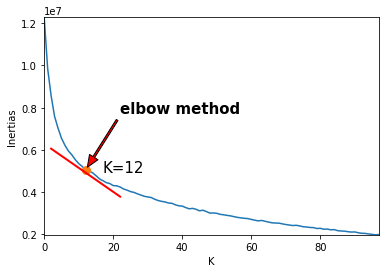

In [30]:
plt.plot(Kin)
# plt.title('The inertias with different K')
plt.ylabel('Inertias')
plt.xlabel('K')
plt.xticks()
n=12
thisx = n
thisy = Kin[n]
textx = n+10
texty = Kin[4]+0.1* Kin[4]
plt.annotate(" ", (thisx,thisy), xycoords='data',
             xytext=(textx,texty), weight='bold',
             arrowprops=dict(facecolor='red',width= 2,headwidth=10,shrink=0.05)) 
plt.text(textx, texty, 'elbow method',fontdict={'size': 15},weight="bold")
plt.plot(thisx,thisy,marker='o', markersize=8) 
plt.text(thisx+5, thisy*0.98, 'K=12',fontdict={'size': 15})
# t= [4, ]
# plt.plot(t,theta,label="$theta$",color="red",linewidth=2)
lv= 10/(thisy-texty)
print(lv)
sx = 2
sy = lv*10+ 1.2*thisy
endy =lv*10+ 0.75*thisy
endx = 22
plt.plot([sx,endx],[sy,endy],'r-',lw = 2)
# plt.plot(endx,endy,marker='o', markersize=8)
# plt.plot(sx,sy,marker='o', markersize=8)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())
# plt.subplots_adjust(top= 1,bottom= 0,left= 0,right= 1,hspace= 0,wspace=0)
plt.margins(0,0)
plt.savefig(f'Inertia.jpg',bbox_inches='tight',dpi= 300)
plt.show()

In [14]:
import joblib
# joblib.dump(K_means, './Cluster/Kmeans.model')

In [20]:
k = joblib.load('./Cluster/Kmeans.model')
print(len(k.labels_))

436


In [21]:
K_means = KMeans(12)
t0 = time.time()
K_means.fit(features)
t_batch = time.time() - t0
#     print('time is ',t_batch)
labels = K_means.labels_
print(labels)
# print(fea_indexs)

# [15 12  7 13  5 13  1 10  5 14  7 10 10  5  5 15  0 15  4 15 10  1  2  4
#  12 14  2  2  1  7  4 13  6  5 14 11 13  7 11 14  7 15 14 14  4  4  6  4
#   8  4  5 10 11 13  7 11  1 10  7  9  4  1  9  4  5  1  8  8  2  2  2  4
#   6  8  2  5 15 15  0 15  1 12  8  3  3 11  4  5  7  7  6  1  7 15  0  9
#  10  9  8 10  6  4  4 13 14 14  2  1  7 12 13 11  7 14  9  6  9  5  1 12
#   0  5 12  4 13  0 13  6  7 12  3 11 13  5 12 12 15  8 13  7 14  5  8  1
#   1 15  7  0 11  5  7 12  7  8 10 13  9  3  0 11  7 12  3 14 10  7  4  5
#   3 13  5 11  6  7  5  2  1  7 10  5 12 14 11  5 15  1 12  2  1  7  4  1
#   6  7  9  3 11  7 12  4  2 11 11 10  0 11 13  5 13  7 11 10 13  0  3 13
#  11  6 13  4 15  5  7  8  7  6  9  9  8  1 11  2 15  4 12  4  5  1  1  1
#  12 12 12 11  2  3 10  4 15 13  1 13 13  4 13  4  5  2 11 15  1  7  5 10
#   9 14 15  7 12 15 11  9 12 12 11 11 14 12  6  7  7  8  2 12  0 13  2  1
#  15 12 13  5 12  8 12  2  7 13 15 12 12 11 10  2  2 10  7 15 12 11  6  9
#   7 15  5  2 11  7  2 10  6  2  4 13 12  4 12  6 13  7  1  6  4  0 11  7
#  11  7  2  5  0 11  2  0  7 14  3  6  6  9 12 15  2  1  0 14  7 12 12  6
#  12  0  4 14  3  7 11  7  8  1  0  8  1  3  7 15  3 13 14  8  1  1  0  9
#   7  7 14  3  3  9  3 15  6  1  7  2  8  5  7 13 13  5 15 11 10 12 15  1
#  11 11 11  1 14  6  7  3  8  9 13 12  1  7  9  7  5  4  9  6  4  7  2  9
#   7 12 14]

# [ 3 12  1  5  5  9 10 13  5 11  1 13  6  5  5  3  0 10  9 15 13 10 14  6
#  12 11  0  6 10  1  9  9  7  5 11  0  9  1  4 11  1 15 11 11  9  6  7  9
#   8  6  5 13  5  9  1  0 10 14  1  2  6 10  2  9 15 10  8  8  6  6  4  9
#   7  8  4  5  3  3  8  3 10 12 11 10  1  0  9  5  1  1  7 10  1  3  8  2
#  13  2  8 14  7  9  9  5 11 11  6 10  1 12  9  5  1 11 11  2  7  2  5 10
#  12  8  3 12  9  5  8  9  7  1 12 12  5  9  5 12 12  3  8  9  1 10  5  8
#  10  3 15  1  0  4  5  1 12  1  7 13  9  2 10  8  0  1 12  1 11  6  1  6
#   5 10  9  5  4  7  1  5  8 10  1 13  5 12 11  4  5  3 15 12  4  3  1  6
#  10  7  1  2 10  5  1 12  9  4  5  7  6  0  0  9  5  9  1  7  6  5  0  1
#   9  5  7  5  6  3  5  1  8  1  7  2  2  8 10  5 14 15  9 12  9  3 15 10
#  10 12 12 12  0  4 10  6  9  3  9 10  4  2  9  9  9  5  0  0  3 10  1  5
#   6  2 11  3  1 12  3  0  2 12 12  4 11 11 12  3  1  1  0  0 12 14  5  4
#   3  3 12  9  5 12 11 12  4  1  9  3 12 12  4 13  4  0 13  1  3  5 11  7
#   2  1 10  5  4  7  1  6 13  7  0  6  9 12  9 12  7  9  1 10  7  6 14  0
#   1  4  1  4  5  0  5  6 11  1 11 12  3  7  2  5 15  6 10 11 11  1 12 12
#   7 12  0  9 15  1  1  5  1  8  3 11  0 15 10  1  3 15  5 11  8 10 15 11
#   2  1  1 11 12 10  2 10  3  3 10  1  8  8  5  1  5  5  3  3  5 13 12 15
#  15  5  7  4 12 11  7  1 10  8  2  9 12 12  1  2  1  5  6  2  3  9  1  4
#   2  1 12 11]

[11 10  7  1 11  6  5  4 11  9  7  4  4  1  1 11  8  5  6 11  4  5  3  6
 10  9  8  3  5  7  6  6  2 11  9  8  6  7  1  9  7 11  9  9  6  6  2  6
  8  6  1  4  1  6  7  9  5  4  7  0  4  5  0  6 11  5  8  8  3  3  3  6
  2  8  3 11 11 11  8 11  5  0  9  5  7  8  6  1  7  7  2  5  7 11  8  0
  4  0  8  4  2  6  6  1  9  9  3  5  7 10  6  9  7  9  0  2  0  1  5  0
  8 11 10  6  1  8  6  2  7  0 10  9  1  1 10 10 11  8  6  7 10  1  8  5
 11  5  7  8  2  1  7  0  7  2  4  6  0 10  8  8  7  0 10 10  4  7  6  1
  5  6  1  3  2  7  1  3  5  7  4  1 10  9  2  1 11  5  0  3 11  7  6  5
  2  7  0  5  9  7 10  6  3  9  2  4  8  9  6 11  1  7  2  4  1  8  7  6
  9  2  1  3 11  1  7  8  7  2  0  0  8  5  1  3  5  6 10  6 11  5  5  5
 10 10 10  8  3 10  4  6 11  3  5  5  3  0  6  1  6 11  8  8 11  5  7  1
  4  0  9 11  7  0 11  8  0 10 10  3  9  9 10  2  7 10  8  8 10  8  1  3
 11 11 10  6 11  0  9 10  3  7  6 11 10  0  2  4  3  8  4  7 11  1  9  2
  0  7  5  1  3  2  7  3  4  2  3  6  3 10  6  0  2

(436, 50)
1617936798.3542535


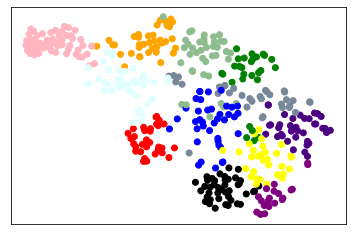

In [22]:
colour = [ "red", "blue", "green", "yellow", "purple", "orange", "black",\
          '#FFB6C1','#4B0082','#778899','#E1FFFF','#8FBC8F' ]
# colour = [ "red", "blue", "green", "yellow", "purple", "orange", "black",\
#           '#FFB6C1','#4B0082','#778899','#E1FFFF','#8FBC8F','#808000','#FFEFD5','#CD853F' ]
color = list(map(lambda x: colour[x], labels))

from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import time

svd = TruncatedSVD(n_components= 50,random_state = 11)
X_reduced = svd.fit_transform(features)
print(X_reduced.shape)
t2 = time.time()
print(t2)
tsne = TSNE(n_components= 2, random_state= 1).fit_transform(X_reduced)

def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    
    plt.figure()
    plt.scatter(data[:,0],data[:,1],c = color )
    plt.xticks([])
    plt.yticks([]) 
#     plt.title(title)
    
    plt.savefig(f'tsne.jpg',bbox_inches='tight',dpi= 300)
    plt.show()
plot_embedding(tsne,labels,"436 lesions clustering with tSNE")

In [ ]:
colour = [ "red", "blue", "green", "yellow", "purple", "orange", "black",\
          '#FFB6C1','#4B0082','#778899','#E1FFFF','#8FBC8F' ]
# colour = [ "red", "blue", "green", "yellow", "purple", "orange", "black",\
#           '#FFB6C1','#4B0082','#778899','#E1FFFF','#8FBC8F','#808000','#FFEFD5','#CD853F' ]
color = list(map(lambda x: colour[x], labels))
def plot_embedding(data, label, title):
    x_min, x_max = np.min(data, 0), np.max(data, 0)
    data = (data - x_min) / (x_max - x_min)
    
    plt.figure()
    plt.scatter(data[:,0],data[:,1],c = color )
    plt.xticks([])
    plt.yticks([]) 
#     plt.title(title)
    
#     plt.savefig(f'tsne.jpg',bbox_inches='tight', dpi= 300)
    plt.show()
plot_embedding(tsne,labels,"436 lesions clustering with tSNE")

In [ ]:
from collections import Counter
a = Counter(labels)
a = dict(a)
print(a)

x =sorted(a.items())
c,d = zip(*x)
print(c,d)
plt.figure()
plt.plot(d)
plt.title('Sample of group')
plt.ylabel('num of sample')
plt.xlabel('Group')
plt.xticks(c)
plt.show()

In [ ]:
# print(labels)
# print(fea_indexs)
index = np.array(fea_indexs)[labels == 0]
# (array([  7,  11,  22,  57,  60,  69,  96,  99, 154, 175, 203, 211, 219,
#        231, 263, 303, 318, 319, 352, 404]),)
print(index)
# fea_indexs

收集聚类图片

In [ ]:
import shutil

image_path = f'./LUNG_image/Lung/{fold_num}_image'
for label in range(16):
    if not os.path.exists(os.path.join(f'./LUNG_image/Lung/{fold_num}_group','group_'+str(label))):
        os.makedirs(os.path.join(f'./LUNG_image/Lung/{fold_num}_group','group_'+str(label)))
    index = np.array(fea_indexs)[labels == label]
#     print(index)
    for i in index:
        t_path = os.path.join(f'./LUNG_image/Lung/{fold_num}_group/group_{label}',str(i))
        if not os.path.exists(t_path):
            os.makedirs(t_path)
        cam_path = os.path.join(image_path,str(i),f'{i}_cam_image.jpg')
        input_path = os.path.join(image_path,str(i),f'{i}_input_lung.jpg')
        normalized_path = os.path.join(image_path,str(i),f'{i}_normalized.jpg')
        t_cam_path = os.path.join(t_path, f'{i}_cam_image.jpg')
        t_input_path = os.path.join(t_path, f'{i}_input_lung.jpg')
        t_normalized_path = os.path.join(t_path, f'{i}_normalized.jpg')
        shutil.copy(cam_path,t_cam_path)
        shutil.copy(input_path,t_input_path)
        shutil.copy(normalized_path,t_normalized_path)

evalution 

In [ ]:
#Here we set the data generators for applying data augmentation methods
fold_num = 5  #Select Fold Number
CSV_path = '  ../../CT/External_dataset/COVIDset/CSV/'
# train_datagen = ImageDataGenerator(horizontal_flip = True,vertical_flip=True,zoom_range = 0.05,rotation_range = 360,width_shift_range = 0.05,height_shift_range=0.05,shear_range=0.05)
test_datagen =  ImageDataGenerator()
# train_df = pd.read_csv('../../CT/External_dataset/COVIDset/CSV/LUNG/normal_lung_train{}.csv'.format(fold_num)) #raed train csv file
# validation_df = pd.read_csv('../../CT/External_dataset/COVIDset/CSV/LUNG/normal_lung_validation{}.csv'.format(fold_num)) # raed validation csv file (Validation in the training process)
# train_df = shuffle(train_df) # Shuffle the train data
test_df = pd.read_csv('../../CT/External_dataset/COVIDset/CSV/LUNG/normal_lung_test{}.csv'.format(fold_num)) # raed test csv file (For evaluating the final version of the trained network)
# print(len(test_df))
test_df = shuffle(test_df)
shape=(512,512,1) #shape of the dataset images (in TIFF format)
#Create the generators
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory=None,
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=10,
        class_mode='categorical', color_mode="grayscale",shuffle=True)
#  3 8329
# 1 8322
# 2 8343
#  4 8315 
# 5 8235